In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     1

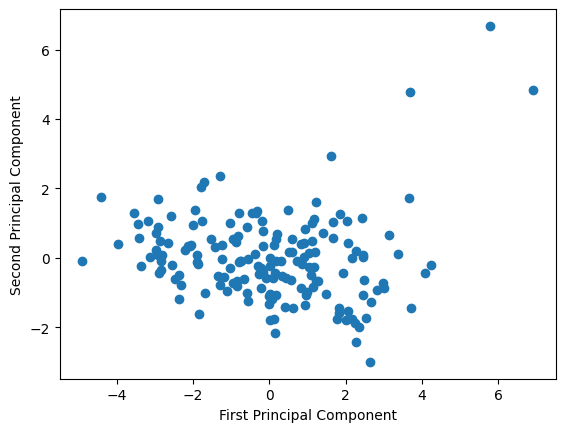

/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


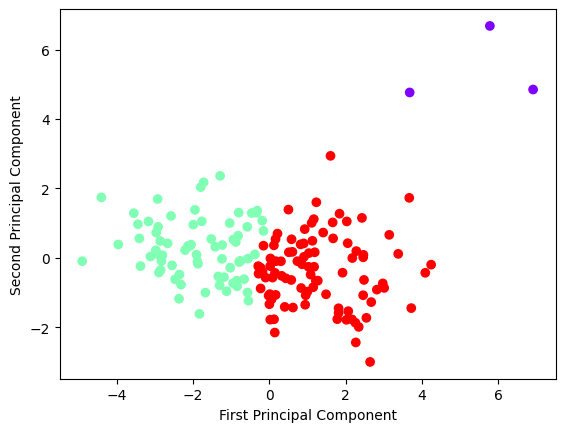

In [2]:
# Load the data set

df = pd.read_csv('country_data.csv')
# Explore the data set

print(df.head())
print(df.shape) 
print(df.info())
print(df.describe())
# Check for missing values

print(df.isnull().sum())
# Drop the country column as it is not a numerical feature

df = df.drop('country', axis=1)
# Scale the data using StandardScaler

scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)
# Apply PCA to reduce the dimensionality of the data

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
# Plot the PCA components

plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.show()
# Apply K-Means clustering to the PCA components

kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(df_pca)
labels = kmeans.labels_
# Plot the clusters with different colors

plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='rainbow') 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()